# Employee Wellness Prediction 

#### This project focuses on building a predictive model for employee mental wellness by carefully cleaning, processing, and analyzing data before applying machine learning techniques.

# Importing necessary Libraries

In [1]:
#Data Handling & Exploration
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score


# 1. Data Gathering

# since, we have to clean both datasets train,test and we need to load both.
#train for model building
#test for prediction

In [2]:
# Load data
train_data = pd.read_csv(r"C:\Users\DELL\Downloads\employee_train__1_.csv-1756126131509")
test_data = pd.read_csv(r"C:\Users\DELL\Downloads\employee_test__1_.csv-1756126132103")

In [3]:
#Training data shape
train_data.shape


(1048, 28)

In [4]:
#Testing data shape
test_data.shape

(210, 27)

In [5]:
#it shows all columns without skiping middle columns in a sequence.
pd.set_option("display.max_columns", None)

In [6]:
train_data.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
test_data.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       210 non-null    int64 
 1   Timestamp                  210 non-null    object
 2   Age                        210 non-null    int64 
 3   Gender                     210 non-null    object
 4   Country                    210 non-null    object
 5   state                      107 non-null    object
 6   self_employed              210 non-null    object
 7   family_history             210 non-null    object
 8   work_interfere             182 non-null    object
 9   no_employees               210 non-null    object
 10  remote_work                210 non-null    object
 11  tech_company               210 non-null    object
 12  benefits                   207 non-null    object
 13  care_options               210 non-null    object
 14  wellness_p

# 2.Exploratory Data Analysis (EDA)

#### Droping Unwanted Columns

In [10]:
def clean_data(train_data, test_data):
    drop_cols = ["Timestamp", "comments", "state", "S.No","Country"]
    train_data = train_data.drop(columns=drop_cols, errors="ignore")
    test_data = test_data.drop(columns=drop_cols, errors="ignore")
    return train_data, test_data

train_data, test_data = clean_data(train_data, test_data)


### Checking values in both Datasets

In [11]:
train_data.isnull().sum()[train_data.isnull().sum() >0]

self_employed        18
work_interfere      236
benefits             13
wellness_program      4
leave                 4
dtype: int64

In [12]:
test_data.isnull().sum()[test_data.isnull().sum() >0]


work_interfere      28
benefits             3
wellness_program     2
leave                5
dtype: int64

## checking null valued columns with mode and unique values, so that we can choose the right replace value or related.

In [13]:
train_data["benefits"].mode()[0]

'Yes'

In [14]:
train_data["benefits"].unique()

array(['Yes', "Don't know", 'No', nan], dtype=object)

In [15]:
train_data["wellness_program"].mode()[0]


'No'

In [16]:
train_data["wellness_program"].unique()


array(['No', "Don't know", 'Yes', nan], dtype=object)

In [17]:
train_data["leave"].mode()[0]


"Don't know"

In [18]:
train_data["leave"].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy', nan], dtype=object)

#### Filling Null values

In [19]:
# Fill categorical columns
train_data['self_employed'] = train_data['self_employed'].fillna("No")

train_data['work_interfere'] = train_data['work_interfere'].fillna("Unknown")
test_data['work_interfere']  = test_data['work_interfere'].fillna("Unknown")


train_data['benefits'] = train_data['benefits'].fillna("Unknown")
test_data['benefits']  = test_data['benefits'].fillna("Unknown")

train_data['wellness_program'] = train_data['wellness_program'].fillna("Don't know")
test_data['wellness_program']  = test_data['wellness_program'].fillna("Don't know")

train_data["leave"] = train_data["leave"].fillna(train_data["leave"].mode()[0])
test_data["leave"] = test_data["leave"].fillna(test_data["leave"].mode()[0])


In [20]:
train_data.isnull().sum()[train_data.isnull().sum() >0]


Series([], dtype: int64)

In [21]:
test_data.isnull().sum()[test_data.isnull().sum() >0]


Series([], dtype: int64)

#### Checking duplicated columns

In [22]:
train_data.duplicated().sum()

np.int64(2)

In [23]:
# See duplicate rows
train_data[train_data.duplicated()]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
821,35,Male,Yes,Yes,Yes,Often,5-Jan,No,Yes,No,Yes,Yes,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No
860,32,male,No,Yes,Yes,Rarely,25-Jun,No,No,No,No,No,No,No,Don't know,Yes,Maybe,Some of them,No,No,No,No,No


#### drop duplicates while keeping their  first record.

In [24]:
train_data.drop_duplicates(keep='first', inplace=True)


In [25]:
# See duplicate rows
#test_data[test_data.duplicated()]

In [26]:
#test_data.drop_duplicates(keep='first', inplace=True)


## outliers

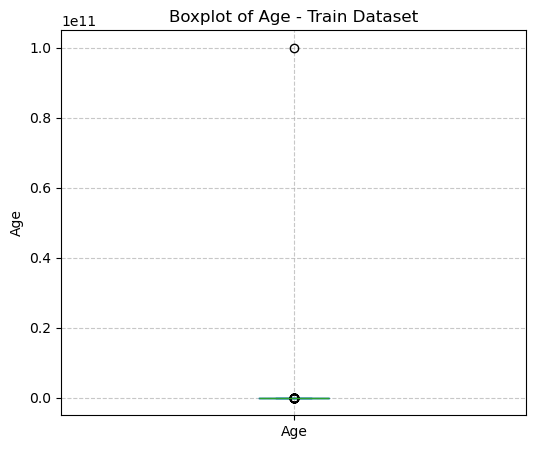

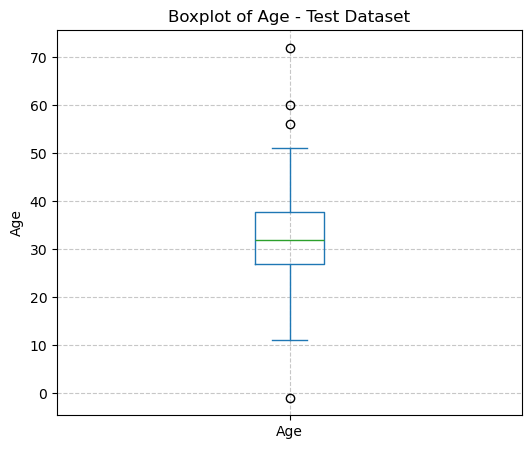

In [27]:
# Function to plot boxplot for Age column
def plot_age_boxplot(df, title):
    plt.figure(figsize=(6, 5))
    df['Age'].plot(kind='box')
    plt.title(f"Boxplot of Age - {title}")
    plt.ylabel("Age")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Boxplot for Age in train and test datasets
plot_age_boxplot(train_data, "Train Dataset")
plot_age_boxplot(test_data, "Test Dataset")


# 3.Feature engineering

In [28]:
# shows unique age and Gender in train_data
print(train_data['Age'].unique())
print(train_data['Gender'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8]
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'N

In [29]:
# shows unique age and Gender in test_data
print(test_data['Age'].unique())
print(test_data['Gender'].unique())

[39 26 23 35 36 42 27 33 31 28 29 44 25 24 34 48 43 41 40 37 32 30 38 11
 45 50 46 20 -1 21 51 72 56 60 22]
['Male' 'female' 'Female' 'M' 'male' 'Male ' 'm' 'p' 'F' 'Woman' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means' 'f']


# Fix Age column

In [30]:
# convert negative age values into positive

train_data['Age'] = train_data['Age'].abs()
test_data['Age'] = test_data['Age'].abs()


In [31]:
def clean_age_feature(df, col="Age"):
    # Replace ages >100 with 65, and <18 with 18
    df[col] = df[col].apply(
        lambda x: 65 if x > 100 else (18 if x < 18 else x)
    )
    return df


In [32]:
train_data = clean_age_feature(train_data, "Age")
test_data = clean_age_feature(test_data, "Age")


In [33]:
train_data["Age"].unique()


array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 65, 55,
       48, 20, 57, 58, 47, 62, 51, 49, 53, 61])

In [34]:
test_data["Age"].unique()

array([39, 26, 23, 35, 36, 42, 27, 33, 31, 28, 29, 44, 25, 24, 34, 48, 43,
       41, 40, 37, 32, 30, 38, 18, 45, 50, 46, 20, 21, 51, 72, 56, 60, 22])

In [35]:
test_data.shape

(210, 22)

In [36]:
train_data["Age"].isnull().sum()

np.int64(0)

# Standardize Gender

#### making standardized Gender column into three categories ["Male","Female","Other"].

In [37]:
def clean_gender(Gender):
    gender = str(Gender).strip().lower()  # normalize

    male_list = ["male","m","male (cis)","cis male","man","guy (-ish) ^_^","male leaning androgynous","mal","malr","msle","mail"]
    female_list = ["female","f","femake","woman","cis female","femail"]

    if gender in [x.lower() for x in male_list]:
        return 'Male'
    elif gender in [x.lower() for x in female_list]:
        return 'Female'
    else:
        return 'Other'

train_data['Gender'] = train_data['Gender'].apply(clean_gender)
test_data['Gender']  = test_data['Gender'].apply(clean_gender)


In [38]:
train_data['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [39]:
test_data['Gender'].unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [40]:
#Encoding Target Variable
train_data['treatment'] = train_data['treatment'].map({'Yes':1, 'No':0})
if 'treatment' in test_data.columns:
   test_data['treatment'] = test_data['treatment'].map({'Yes':1, 'No':0})


# 4.Data Encoding

In [41]:
# Categorical columns in train_data
cat_cols_train = train_data.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns in train_data:", cat_cols_train)

Categorical columns in train_data: ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [42]:
# Categorical columns in test_data
cat_cols_test = test_data.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns in test_data:", cat_cols_test)

Categorical columns in test_data: ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [43]:
# Ensure we only encode columns that exist in both datasets
common_cat_cols = list(set(cat_cols_train).intersection(set(cat_cols_test)))
print("Common categorical columns:", common_cat_cols)

Common categorical columns: ['seek_help', 'coworkers', 'benefits', 'self_employed', 'anonymity', 'work_interfere', 'no_employees', 'family_history', 'mental_health_interview', 'supervisor', 'Gender', 'care_options', 'tech_company', 'phys_health_consequence', 'mental_health_consequence', 'remote_work', 'leave', 'obs_consequence', 'mental_vs_physical', 'phys_health_interview', 'wellness_program']


In [44]:
# Label Encoding
encoders = {}
for col in common_cat_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col]  = le.transform(test_data[col].astype(str))
    encoders[col] = le

In [45]:
# cheking all object columns

train_data.columns[train_data.dtypes == 'object']

Index([], dtype='object')

In [46]:
train_data.isnull().sum()[train_data.isnull().sum() >0]

Series([], dtype: int64)

# 6.Data Splitting(Train-Test Split)


In [47]:
# Features and target
X = train_data.drop(columns=['treatment'])
y = train_data['treatment']

# Split into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Validation shape:", X_val.shape)


Train shape: (836, 22) Validation shape: (210, 22)


# 7.Model Training & Evaluation

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid Search
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit on training set
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

# Evaluate on validation set
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8241445680068434
Validation Accuracy: 0.8285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       108
           1       0.83      0.81      0.82       102

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210


Confusion Matrix:
 [[91 17]
 [19 83]]


# 8.predict test dataset

In [49]:
# test_data
X_test = test_data
# Predictions on Test Data
test_preds = grid_rf.predict(X_test)

In [50]:
# Convert predictions back to Yes/No if needed
test_pred_labels = ["Yes" if p == 1 else "No" for p in test_preds]

In [51]:
# Add predictions to test_data
test_data["treatment"] = test_pred_labels

# 9.saving predict test dataset

In [52]:
# Reset index to avoid gaps
test_data.reset_index(drop=True, inplace=True)

# Keep only the 'treatment' column
final_output = test_data[['treatment']].copy()

# Add S.No starting from 1
final_output.insert(0, "S.No", final_output.index + 1)

# ------------------ Save Results ------------------
final_output.to_csv("Employee_Wellness_prediction_test.csv", index=False)
print("✅ Predictions with S.No saved to 'Employee_Wellness_prediction_test.csv'")

final_output.head()


✅ Predictions with S.No saved to 'Employee_Wellness_prediction_test.csv'


,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


# 10.Conclusion

#### Finally got the Accuracy: 83 

#### Applied Grid Search for hyperparameter tuning to optimize accuracy.

#### Final model performance was validated on the test dataset.